In [1]:
import pandas as pd
from feature_engine.creation import CyclicalFeatures 
data = pd.read_csv('../data//promice/preprocessed/daily/KAN_L.csv')
data = data.drop(['Unnamed: 0','Surface height from combined measurements'], axis=1)
TARGET = ['Surface height from combined measurements DELTA']

In [2]:
data.index = pd.to_datetime(data['Datetime'], format='%Y-%m-%d')
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%Y-%m-%d')
display(data)
print(data.info())
data['Ablation'].value_counts()

,stid,Datetime,Air pressure (upper boom),Air temperature (upper boom),Relative humidity (upper boom) - corrected,Specific humidity (upper boom),Wind speed (upper boom),Wind from direction (upper boom),Downwelling shortwave radiation - corrected,Upwelling shortwave radiation - corrected,Downwelling longwave radiation,Upwelling longwave radiation,Surface temperature,Latent heat flux (upper boom),Sensible heat flux (upper boom),Surface height from combined measurements DELTA,Albedo,Cloud cover,Ablation,Melting Season
Datetime,,,,,,,,,,,,,,,,,,,,
2008-09-01 00:00:00+00:00,KAN_L,2008-09-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099,NaN,NaN,True,beginning
2008-09-02 00:00:00+00:00,KAN_L,2008-09-02 00:00:00+00:00,930.272417,4.067042,80.716750,4.420708,4.616417,151.127125,79.998500,43.203958,305.296625,318.976333,0.000,10.214708,45.592458,-0.053,0.545000,0.684958,True,beginning
2008-09-03 00:00:00+00:00,KAN_L,2008-09-03 00:00:00+00:00,928.642042,2.856625,84.547542,4.257667,2.589208,130.834917,99.346417,51.914583,310.954875,317.836000,0.000,1.970375,13.956375,-0.023,0.525000,0.808042,True,beginning
2008-09-04 00:00:00+00:00,KAN_L,2008-09-04 00:00:00+00:00,927.952250,2.757833,75.053708,3.746167,3.055417,126.096500,167.023750,95.056417,282.167458,317.062542,0.000,-7.634542,17.556875,-0.052,0.568125,0.507583,True,middle
2008-09-05 00:00:00+00:00,KAN_L,2008-09-05 00:00:00+00:00,914.642583,2.768333,87.821500,4.468500,2.539667,127.975583,49.319542,28.411292,323.629292,318.614667,0.000,3.087167,13.924292,-0.002,0.576571,0.945250,True,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-16 00:00:00+00:00,KAN_L,2023-02-16 00:00:00+00:00,921.000000,-21.670000,63.228000,0.375000,6.349000,112.600000,0.000000,0.000000,166.768000,215.685000,-24.368,-4.200000,50.862000,-0.011,NaN,0.351000,False,NaN
2023-02-17 00:00:00+00:00,KAN_L,2023-02-17 00:00:00+00:00,918.000000,-15.260000,92.409000,1.010000,5.455000,128.400000,0.000000,0.000000,220.517000,244.183000,-16.785,2.804000,25.015000,0.028,NaN,0.680000,False,NaN
2023-02-18 00:00:00+00:00,KAN_L,2023-02-18 00:00:00+00:00,923.000000,-17.380000,83.281000,0.743000,4.870000,106.100000,0.000000,0.000000,178.894000,231.451000,-19.941,1.702000,35.889000,-0.002,NaN,0.322000,False,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5286 entries, 2008-09-01 00:00:00+00:00 to 2023-02-20 00:00:00+00:00
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype              
---  ------                                           --------------  -----              
 0   stid                                             5286 non-null   object             
 1   Datetime                                         5286 non-null   datetime64[ns, UTC]
 2   Air pressure (upper boom)                        5283 non-null   float64            
 3   Air temperature (upper boom)                     5283 non-null   float64            
 4   Relative humidity (upper boom) - corrected       5283 non-null   float64            
 5   Specific humidity (upper boom)                   5283 non-null   float64            
 6   Wind speed (upper boom)                          5279 non-null   float64            
 7   Wind from direction (upper boo

False    3729
True     1557
Name: Ablation, dtype: int64

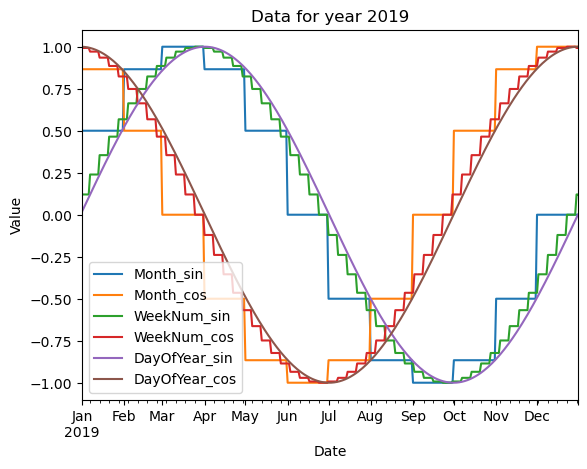

In [106]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn import set_config
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


def add_features(data):
    df = data.copy()
    df['DayOfYear'] = df['Datetime'].dt.dayofyear
    df['WeekNum'] = df['Datetime'].dt.isocalendar().week.astype(int)
    df['Month'] = df['Datetime'].dt.month
    df['Year'] = df['Datetime'].dt.year
    return df
df = add_features(data)

cyclical_cols = ['DayOfYear','Month','WeekNum', 'Wind from direction (upper boom)']

numerical_cols = [x for x in df.select_dtypes(include=['int64','float64']).drop('Surface height from combined measurements DELTA',axis=1).columns.to_list() if x not in cyclical_cols]

#display(df.isna().sum()) 
#df[numerical_cols] = df[numerical_cols].ffill()
#display(df.isna().sum()) 

df = df.ffill().dropna()



cyclical = CyclicalFeatures(variables=cyclical_cols, max_values={'Month':12,'WeekNum':52,'DayOfYear':365,'Wind from direction (upper boom)':360},drop_original=True)
cyclical_values = cyclical.fit_transform(df[cyclical_cols])
df = df.drop(cyclical_cols,axis=1)

df = df.merge(cyclical_values,how='left',left_index=True,right_index=True)
cyclical_cols = cyclical_values.columns.to_list()

num_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler())

preprocessor = make_column_transformer(
(num_transformer, numerical_cols)
)

df[numerical_cols] = preprocessor.fit_transform(df)

df_year = cyclical_values[cyclical_values.index.year == 2019]
plot_cols = cyclical_values.columns.to_list()[:-2]

#plotting cyclical_conversion
df_year[plot_cols].plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Data for year 2019')
plt.show()

In [113]:
TARGET = ['Surface height from combined measurements DELTA']
FEATURES = cyclical_cols+numerical_cols



X = df[FEATURES]
y = df[TARGET]

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=7,
    max_train_size=1400,
    test_size=100
)

all_splits = list(ts_cv.split(X,y))
train_0,test_0 = all_splits[0]
#X.iloc[test_0]




param_grid = {
    'max_depth': [3], #[3, 5, 7],
    'min_child_weight': [1], #[1, 3, 5],
    'learning_rate': [0.1,],# 0.01, 0.001],
    'n_estimators': [100],# [100, 500, 1000],
    'subsample': [1.0], #[0.5, 0.7, 1.0],
    'colsample_bytree': [0.7], #[0.5, 0.7, 1.0],
    'reg_alpha': [0.5], # [0, 0.1, 0.5],
    'reg_lambda': [0.1], # [0, 0.1, 0.5]

}

grid = GridSearchCV(xgb.XGBRegressor(),param_grid=param_grid,cv=ts_cv,verbose=1,scoring='neg_mean_squared_error')



grid.fit(X,y)
#print(xgb_pipeline.get_params)

#grid_search = GridSearchCV(xgb_pipeline, param_grid=param_grid, cv=ts_cv,verbose=1)
#grid_search.fit(X,y)

# Print the best hyperparameters and the corresponding R^2 score on the test set
print(f"Best hyperparameters", grid.best_params_)

# Save the best model parameters as 'model' variable
#best_params = grid_search.best_estimator_
#print(best_params)
print(len(all_splits))
for i in range(0,len(all_splits)):
    test_i = all_splits[i][1]
    y_pred = grid.predict(X.iloc[test_i])
# Evaluate the best model on the test set
    r2 = r2_score(y.iloc[test_i], y_pred)
    mse = mean_squared_error(y.iloc[test_i], y_pred)
    print(f"R^2 score on test set ({i}): ", r2)
    print(f"MSE on test set ({i}): ", mse)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'subsample': 1.0}
5
R^2 score on test set (0):  -0.004609301722812598
MSE on test set (0):  0.0009156266355883208
R^2 score on test set (1):  -0.010064064197769618
MSE on test set (1):  0.002102590162622339
R^2 score on test set (2):  0.9142311946184996
MSE on test set (2):  0.009810603556059007
R^2 score on test set (3):  0.7061069645967691
MSE on test set (3):  0.007798484022658594
R^2 score on test set (4):  -0.16130408699279153
MSE on test set (4):  0.0003517379883461545


[16:22:17] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-rmse:0.47781	validation_1-rmse:0.50281
[50]	validation_0-rmse:0.11039	validation_1-rmse:0.18343
[72]	validation_0-rmse:0.10539	validation_1-rmse:0.18401


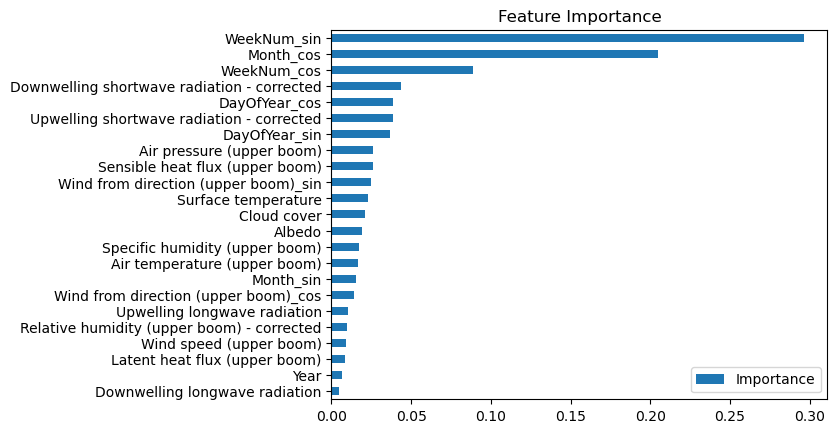

In [121]:
X_train = X.loc[X.index < '01-01-2022']
y_train = y.loc[y.index < '01-01-2022']
X_test = X.loc[X.index >= '01-01-2022']
y_test = y.loc[y.index >= '01-01-2022']

rec = xgb.XGBRegressor(
    max_depth=3,
    min_child_weight=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=0.1,
    verbose=10,
    early_stopping_rounds=20)

rec.fit(X_train, y_train,
        eval_set=[(X_train, y_train),(X_test,y_test)],
        verbose=50)

f1 = pd.DataFrame(data=rec.feature_importances_,
             index=rec.feature_names_in_,
             columns=['Importance'])
f1.sort_values('Importance').plot(kind='barh',title='Feature Importance')

pred = rec.predict(X_test)

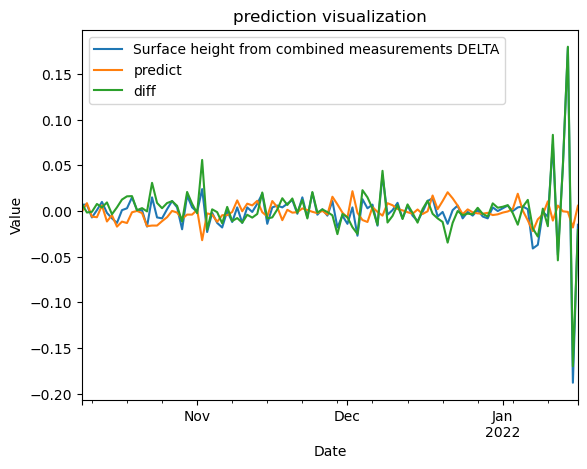

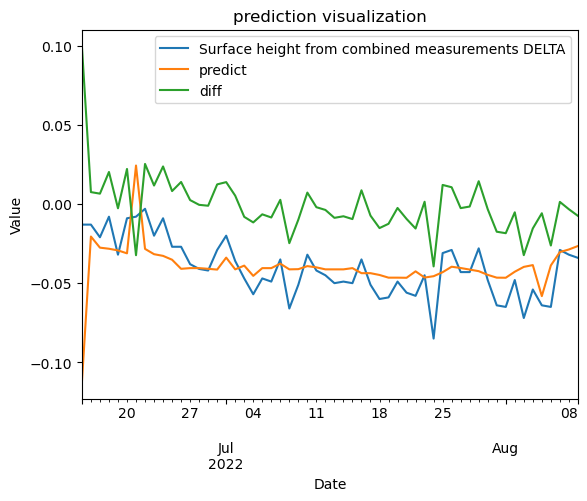

,stid,Datetime,Air pressure (upper boom),Air temperature (upper boom),Relative humidity (upper boom) - corrected,Specific humidity (upper boom),Wind speed (upper boom),Downwelling shortwave radiation - corrected,Upwelling shortwave radiation - corrected,Downwelling longwave radiation,...,Melting Season,Year,Month_sin,Month_cos,WeekNum_sin,WeekNum_cos,DayOfYear_sin,DayOfYear_cos,Wind from direction (upper boom)_sin,Wind from direction (upper boom)_cos
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-11 00:00:00+00:00,KAN_L,2022-06-11 00:00:00+00:00,0.629028,0.832317,0.685269,0.511154,0.114151,0.890020,0.771583,0.645378,...,beginning,0.933333,1.224647e-16,-1.0,0.354605,-0.935016,0.345612,-0.938377,0.985510,0.169615
2022-06-12 00:00:00+00:00,KAN_L,2022-06-12 00:00:00+00:00,0.529288,0.767301,0.922508,0.479469,0.228899,0.542897,0.605961,0.745395,...,beginning,0.933333,1.224647e-16,-1.0,0.354605,-0.935016,0.329408,-0.944188,-0.112792,-0.993619
2022-06-13 00:00:00+00:00,KAN_L,2022-06-13 00:00:00+00:00,0.621395,0.710420,0.861118,0.365814,0.152376,0.713752,0.848646,0.736796,...,beginning,0.933333,1.224647e-16,-1.0,0.239316,-0.970942,0.313107,-0.949718,0.481008,-0.876716
2022-06-14 00:00:00+00:00,KAN_L,2022-06-14 00:00:00+00:00,0.619868,0.717512,0.823194,0.365747,0.249445,0.705827,0.790205,0.710647,...,beginning,0.933333,1.224647e-16,-1.0,0.239316,-0.970942,0.296713,-0.954967,-0.907911,-0.419164
2022-06-15 00:00:00+00:00,KAN_L,2022-06-15 00:00:00+00:00,0.582720,0.762423,0.664945,0.385951,0.149738,0.871771,0.945366,0.605255,...,beginning,0.933333,1.224647e-16,-1.0,0.239316,-0.970942,0.280231,-0.959933,-0.019229,-0.999815
2022-06-16 00:00:00+00:00,KAN_L,2022-06-16 00:00:00+00:00,0.521146,0.853886,0.298293,0.398242,0.274066,0.888766,0.824151,0.534428,...,beginning,0.933333,1.224647e-16,-1.0,0.239316,-0.970942,0.263665,-0.964614,0.851422,-0.524481
2022-06-17 00:00:00+00:00,KAN_L,2022-06-17 00:00:00+00:00,0.497737,0.852965,0.745790,0.576046,0.304744,0.471053,0.414765,0.825099,...,beginning,0.933333,1.224647e-16,-1.0,0.239316,-0.970942,0.247022,-0.969010,0.681573,-0.731750
2022-06-18 00:00:00+00:00,KAN_L,2022-06-18 00:00:00+00:00,0.573051,0.847528,0.933085,0.637257,0.160265,0.406594,0.366731,0.851026,...,beginning,0.933333,1.224647e-16,-1.0,0.239316,-0.970942,0.230306,-0.973118,0.742220,-0.670157
2022-06-19 00:00:00+00:00,KAN_L,2022-06-19 00:00:00+00:00,0.648365,0.829631,0.748373,0.529478,0.144239,0.879073,0.754901,0.579512,...,beginning,0.933333,1.224647e-16,-1.0,0.239316,-0.970942,0.213521,-0.976938,0.942969,0.332881


In [122]:
y_test_grid = y.iloc[all_splits[0][1]]
y_pred_grid = grid.predict(X.iloc[all_splits[0][1]])

y_test_grid = y_test_grid.assign(predict =y_pred_grid)
y_test_grid['diff'] = y_test_grid['Surface height from combined measurements DELTA'] - y_test_grid['predict']


#plotting cyclical_conversion
y_test_grid.plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'prediction visualization')
plt.show()


y_test_xgb = y_test
y_pred_xgb = rec.predict(X_test)
y_test_xgb = y_test_xgb.assign(predict = y_pred_xgb)
y_test_xgb['diff'] = y_test_xgb['Surface height from combined measurements DELTA'] - y_test_xgb['predict']

y_test_xgb = y_test_xgb[(y_test_xgb.index > '2022-06-14') & (y_test_xgb.index < '2022-08-10')]
#plotting cyclical_conversion
y_test_xgb.plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'prediction visualization')
plt.show()
#display(y_test_xgb)

df_disp = df[(df.index > '2022-06-10') & (df.index < '2022-06-20')]
display(df_disp)



## imputing values and defining train test split

In [83]:
#measuring only delta
TARGET = 'Surface height from combined measurements DELTA'
FEATURES = df.select_dtypes(include=['int64','float64']).columns.to_list()

FEATURES.remove('Surface height from combined measurements')

train = df.loc[df.index < '01-01-2018']
test = df.loc[df.index >= '01-01-2018']

print(FEATURES)

['Air pressure (upper boom)', 'Air temperature (upper boom)', 'Relative humidity (upper boom) - corrected', 'Specific humidity (upper boom)', 'Wind speed (upper boom)', 'Wind from direction (upper boom)', 'Downwelling shortwave radiation - corrected', 'Upwelling shortwave radiation - corrected', 'Downwelling longwave radiation', 'Upwelling longwave radiation', 'Surface temperature', 'Latent heat flux (upper boom)', 'Sensible heat flux (upper boom)', 'Surface height from combined measurements DELTA', 'Albedo', 'Cloud cover', 'Year', 'DayOfYear_sin', 'DayOfYear_cos', 'Month_sin', 'Month_cos', 'WeekNum_sin', 'WeekNum_cos']
